In [ ]:
# Mount google drive to have access to your data
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
#Import essentials packages required 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, 
                            classification_report, precision_score,f1_score,recall_score)

In [ ]:
# Import the dataset by specifying the path of the file
df= pd.read_csv('/gdrive/My Drive/creditcard.csv')

### ***DATA EXPLORATION***





In [ ]:
#display the first 5 rows of the dataset

print(df.head(5))

   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


In [ ]:
# DataFrame structure architecture
#dimensions: number of rows, number of columns
df.shape

(284807, 31)

In [ ]:
# enumeration of columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
#type of each column
print(df.dtypes)

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [ ]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [ ]:
 #data description with statistical indicators( mean, minimum, maximum)
print(df.describe(include='all'))

                 V1            V2  ...        Amount          Class
count  2.848070e+05  2.848070e+05  ...  2.848070e+05  284807.000000
mean   3.919560e-15  5.688174e-16  ...  3.202236e-16       0.001727
std    1.958696e+00  1.651309e+00  ...  1.000002e+00       0.041527
min   -5.640751e+01 -7.271573e+01  ... -3.532294e-01       0.000000
25%   -9.203734e-01 -5.985499e-01  ... -3.308401e-01       0.000000
50%    1.810880e-02  6.548556e-02  ... -2.652715e-01       0.000000
75%    1.315642e+00  8.037239e-01  ... -4.471707e-02       0.000000
max    2.454930e+00  2.205773e+01  ...  1.023622e+02       1.000000

[8 rows x 30 columns]


In [ ]:
# Verify missing value
print(df.notnull())

        Time    V1    V2    V3    V4  ...   V26   V27   V28  Amount  Class
0       True  True  True  True  True  ...  True  True  True    True   True
1       True  True  True  True  True  ...  True  True  True    True   True
2       True  True  True  True  True  ...  True  True  True    True   True
3       True  True  True  True  True  ...  True  True  True    True   True
4       True  True  True  True  True  ...  True  True  True    True   True
...      ...   ...   ...   ...   ...  ...   ...   ...   ...     ...    ...
284802  True  True  True  True  True  ...  True  True  True    True   True
284803  True  True  True  True  True  ...  True  True  True    True   True
284804  True  True  True  True  True  ...  True  True  True    True   True
284805  True  True  True  True  True  ...  True  True  True    True   True
284806  True  True  True  True  True  ...  True  True  True    True   True

[284807 rows x 31 columns]


In [ ]:
#Distribution Analysis
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### **DATA VISUALISATION** 

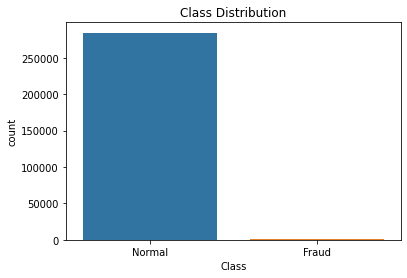

In [ ]:
#Distribution analysis
sns.countplot(df['Class'])
plt.title('Class Distribution')
plt.xticks(range(2),['Normal','Fraud'])
plt.show()

In [ ]:
""" We notice that our data is very ambulanced, the number of Fraud data is insignicative compared to Normal data in this a 
big problem because even without trainig our model we will got a hight accuracy. 
Most machine learning algorithms work best when the number of samples in each class are about equal. 
This is because most algorithms are designed to maximize accuracy and reduce error."""

In [ ]:
#Separate normal and fraud data
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

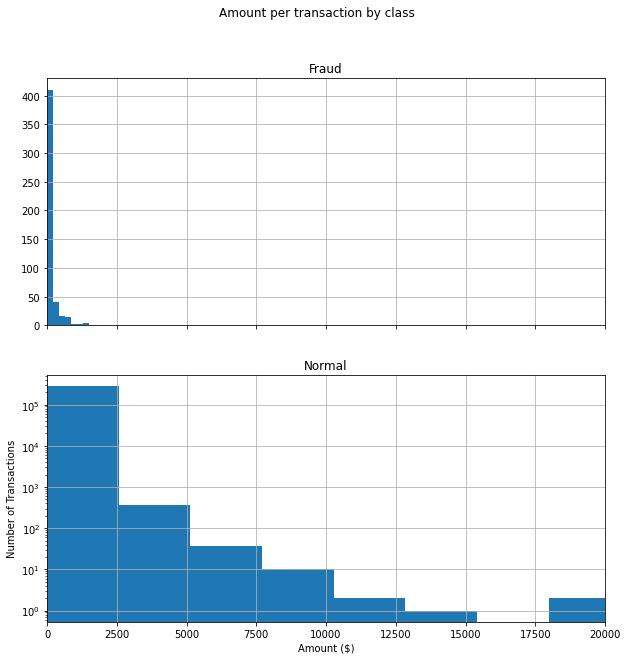

In [ ]:
# Visualizing the Amount per transaction by class

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (10,10) )
f.suptitle('Amount per transaction by class')
bins = 10
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
ax1.grid()
ax2.grid()
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

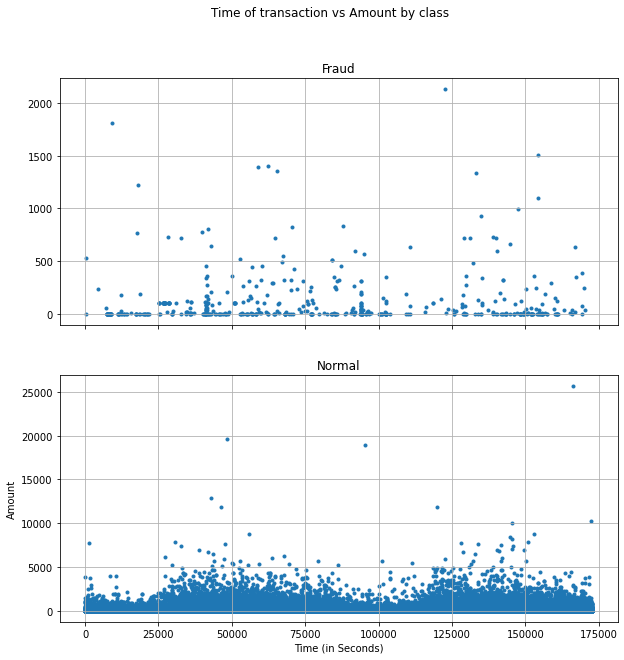

In [ ]:
# Visualizing Time of transaction vs Amount by class
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10))
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount, marker='.')
ax1.set_title('Fraud')
ax1.grid()
ax2.scatter(normal.Time, normal.Amount, marker='.')
ax2.set_title('Normal')
ax2.grid()
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
""" In the figures above we can notice that  the amount of transactions don't change over the time so we will drop the 
column Time as he will not give us more information 
"""

In [ ]:
# Drop column Time
df = df.drop(['Time'], axis =1)

In [ ]:
# We can see that the column "Time" is deleted 
print(df.head(5))

         V1        V2        V3        V4  ...       V27       V28  Amount  Class
0 -1.359807 -0.072781  2.536347  1.378155  ...  0.133558 -0.021053  149.62      0
1  1.191857  0.266151  0.166480  0.448154  ... -0.008983  0.014724    2.69      0
2 -1.358354 -1.340163  1.773209  0.379780  ... -0.055353 -0.059752  378.66      0
3 -0.966272 -0.185226  1.792993 -0.863291  ...  0.062723  0.061458  123.50      0
4 -1.158233  0.877737  1.548718  0.403034  ...  0.219422  0.215153   69.99      0

[5 rows x 30 columns]


In [ ]:
""" By observing our dataset we notice that all the values of each column has been normalized ie all the value are in the same scale
except for the column Amount so we will normalize this colomn too """

In [ ]:
# Normalization of column Amount 
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
print(df.head(5))

         V1        V2        V3        V4  ...       V27       V28    Amount  Class
0 -1.359807 -0.072781  2.536347  1.378155  ...  0.133558 -0.021053  0.244964      0
1  1.191857  0.266151  0.166480  0.448154  ... -0.008983  0.014724 -0.342475      0
2 -1.358354 -1.340163  1.773209  0.379780  ... -0.055353 -0.059752  1.160686      0
3 -0.966272 -0.185226  1.792993 -0.863291  ...  0.062723  0.061458  0.140534      0
4 -1.158233  0.877737  1.548718  0.403034  ...  0.219422  0.215153 -0.073403      0

[5 rows x 30 columns]


### ***MODELING***

In [ ]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=0.20, random_state=27)

In [ ]:
""" As we said previouly our data is very imbalanced  and most machine learning
 algorithms do not work very well with imbalanced datasets. So for that we are going to use 
 two techniques (Oversampling, and Undersamplling) that will help us, to train a classifier to detect the abnormal class"""

# ***OVERERSAMPLING***

In [ ]:
""" oversampling is used when the quantity of data is insufficient. It tries to 
balance dataset by increasing the size of rare samples """

In [ ]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
# separate minority and majority classes
normal = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(normal), # match number in majority class
                          random_state=27) # reproducible results
# combine majority and upsampled minority
data = pd.concat([normal, fraud_upsampled])

In [ ]:
# check new class counts
data.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

In [ ]:
# Reseparate input features and target
y_train = data.Class
X_train = data.drop('Class', axis=1)

In [ ]:
#Using LogisticRegression
classifier  = LogisticRegression(solver='liblinear', random_state = 27)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=27, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Prediction
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 1 ... 0 0 0]


In [ ]:
# Print accuracy
print(accuracy_score(y_test, y_pred))

0.9778657902867897


In [ ]:
# Confusion matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[69510  1560]
 [   16   116]]


In [ ]:
# Classification report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.07      0.88      0.13       132

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.56     71202
weighted avg       1.00      0.98      0.99     71202



### ***UNDERSAMPLING***

In [ ]:
""" Under-sampling balances the dataset by reducing the size of the abundant class. 
This method is used when quantity of data is sufficient. By keeping all samples in the 
rare class and randomly selecting an equal number of samples in the abundant class, 
a balanced new dataset can be retrieved for further modelling """

In [ ]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
normal_downsampled = resample(normal,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
data = pd.concat([normal_downsampled, fraud])

In [ ]:
# checking counts
data.Class.value_counts()

1    360
0    360
Name: Class, dtype: int64

In [ ]:
"""Again, we have an equal ratio of fraud to not fraud data points, but in this case 
a much smaller quantity of data to train the model on. 
Let’s again apply our logistic regression """

In [ ]:
# Let's apply again logistic regression with the undersampled dataset
# Reseparate input features and target
y_train = data.Class
X_train = data.drop('Class', axis=1)

In [ ]:
classifier  = LogisticRegression(solver='liblinear', random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Prediction
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 1 ... 0 0 0]


In [ ]:
# Print accuracy
print(accuracy_score(y_test, y_pred))

0.9637650627791354


In [ ]:
# Confusion matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[68505  2565]
 [   15   117]]


In [ ]:
# Classification report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71070
           1       0.04      0.89      0.08       132

    accuracy                           0.96     71202
   macro avg       0.52      0.93      0.53     71202
weighted avg       1.00      0.96      0.98     71202



In [ ]:
""" Comparing the different metric of both Undersampling and Oversamplig we can conclude that Oversamplig 
performed better than  oversampling .


Note that there is no absolute advantage of one resampling method over another. Application of these two 
methods depends on the use case it applies to and the dataset itself. Another technique which is by combining the over- and under-sampling 
can also be used.


"""

